In [57]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
np.set_printoptions(precision = 2)

In [2]:
life_sat = pd.read_csv("../../Datasets/lifesat.csv")

In [3]:
X_main = life_sat[["GDP per capita (USD)"]].values
y = life_sat["Life satisfaction"].values

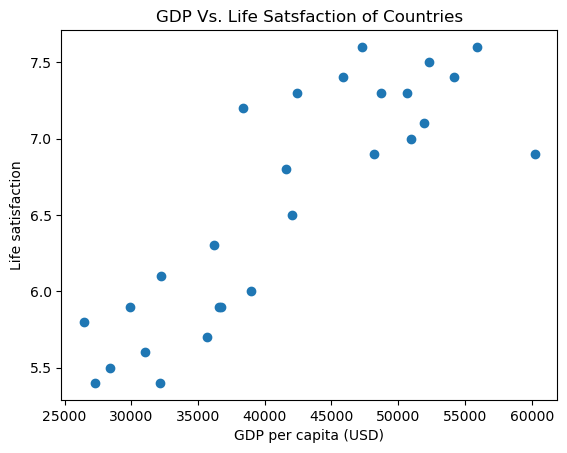

In [4]:
plt.scatter(X_main, y)
plt.title("GDP Vs. Life Satsfaction of Countries")
plt.xlabel("GDP per capita (USD)")
plt.ylabel("Life satisfaction");

In [5]:
X = np.hstack([np.ones((X_main.shape[0], 1)), X_main])

In [6]:
def cost_function(x, y, theta):
    m, _ = x.shape
    f_theta = x.dot(theta)
    error = f_theta - y
    cost = 1/(2*m) * np.sum(error ** 2)
    return cost

In [10]:
# t = np.array([0, 0])
# cost_function(X, y, t)

In [15]:
def gradient_function(x, y, theta):
    m, _ = x.shape
    f_theta = np.dot(x, theta)
    error = f_theta - y
    dh_dtheta = 1/m * np.dot(x.T, error)
    return dh_dtheta

In [17]:
# t = np.array([0, 0])
# gradient_function(X, y, t)

In [221]:
def gradient_descent(x, y, theta_in, a, num_iters):
    m, _ = x.shape
    theta = theta_in
    h_history = []
    p_history = []

    for i in range(num_iters):
        dh_dt = gradient_function(x, y, theta)
        theta -= a * dh_dt
        h_history.append(cost_function(x, y, theta))
        p_history.append(theta)

        if i % math.ceil(num_iters/10) == 0:
            print(f"iteration {i:5}: {h_history[-1]:.2e},",
                 f"dh_dt: {dh_dt}, theta: {theta}")
            
    plt.plot(h_history[:100], color = 'green')
    plt.xlabel('Iteration')
    plt.ylabel('Cost')
    return theta

iteration     0: 1.47e+01, dh_dt: [-6.57e+00 -2.79e+05], theta: [6.57e-09 2.79e-04]
iteration 10000: 4.22e-01, dh_dt: [-1.84e-01  4.22e-06], theta: [1.85e-06 1.54e-04]
iteration 20000: 4.22e-01, dh_dt: [-1.84e-01  4.22e-06], theta: [3.69e-06 1.54e-04]
iteration 30000: 4.22e-01, dh_dt: [-1.84e-01  4.22e-06], theta: [5.53e-06 1.54e-04]
iteration 40000: 4.22e-01, dh_dt: [-1.84e-01  4.22e-06], theta: [7.38e-06 1.54e-04]
iteration 50000: 4.22e-01, dh_dt: [-1.84e-01  4.22e-06], theta: [9.22e-06 1.54e-04]
iteration 60000: 4.22e-01, dh_dt: [-1.84e-01  4.22e-06], theta: [1.11e-05 1.54e-04]
iteration 70000: 4.22e-01, dh_dt: [-1.84e-01  4.22e-06], theta: [1.29e-05 1.54e-04]
iteration 80000: 4.22e-01, dh_dt: [-1.84e-01  4.22e-06], theta: [1.47e-05 1.54e-04]
iteration 90000: 4.22e-01, dh_dt: [-1.84e-01  4.22e-06], theta: [1.66e-05 1.54e-04]


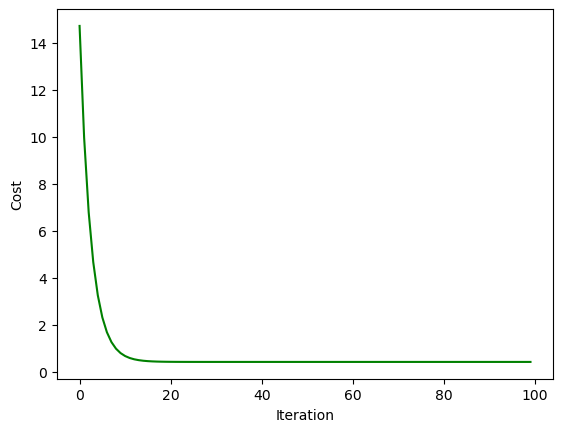

In [223]:
theta_initial = np.zeros(X.shape[1])
alpha = 1.0e-9
iterations = 100000
theta_final = gradient_descent(X, y, theta_initial, alpha, iterations)

In [225]:
y_predicted = np.dot(X, theta_final)

In [227]:
y_predicted

array([4.06, 4.19, 4.36, 4.6 , 4.76, 4.94, 4.95, 5.47, 5.56, 5.61, 5.64,
       5.89, 5.99, 6.39, 6.45, 6.51, 7.04, 7.26, 7.4 , 7.48, 7.78, 7.82,
       7.97, 8.03, 8.32, 8.59, 9.25])

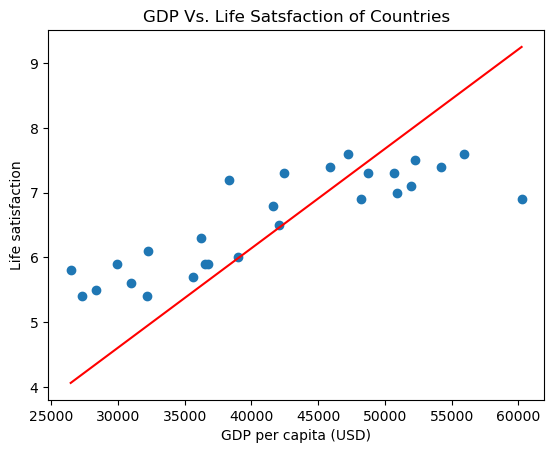

In [229]:
plt.scatter(X_main, y)
plt.plot(X_main, y_predicted, color = 'red')
plt.title("GDP Vs. Life Satsfaction of Countries")
plt.xlabel("GDP per capita (USD)")
plt.ylabel("Life satisfaction");

In [231]:
def standardization(x):
    m = np.mean(x, axis = 0)
    sd = np.mean(x, axis = 0)
    x = (x - m)/sd
    return m, sd, x

In [233]:
mean, sigma, X_st = standardization(X_main)

In [235]:
X_norm = np.hstack([np.ones((X_st.shape[0], 1)), X_st])

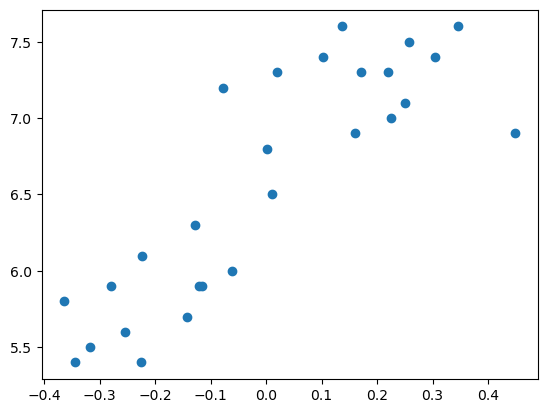

In [237]:
plt.scatter(X_st, y);

iteration     0: 2.62e-01, dh_dt: [-6.57 -0.15], theta: [6.57 0.15]
iteration 10000: 7.70e-02, dh_dt: [ 3.29e-16 -2.16e-16], theta: [6.57 2.82]
iteration 20000: 7.70e-02, dh_dt: [ 3.29e-16 -2.16e-16], theta: [6.57 2.82]
iteration 30000: 7.70e-02, dh_dt: [ 3.29e-16 -2.16e-16], theta: [6.57 2.82]
iteration 40000: 7.70e-02, dh_dt: [ 3.29e-16 -2.16e-16], theta: [6.57 2.82]
iteration 50000: 7.70e-02, dh_dt: [ 3.29e-16 -2.16e-16], theta: [6.57 2.82]
iteration 60000: 7.70e-02, dh_dt: [ 3.29e-16 -2.16e-16], theta: [6.57 2.82]
iteration 70000: 7.70e-02, dh_dt: [ 3.29e-16 -2.16e-16], theta: [6.57 2.82]
iteration 80000: 7.70e-02, dh_dt: [ 3.29e-16 -2.16e-16], theta: [6.57 2.82]
iteration 90000: 7.70e-02, dh_dt: [ 3.29e-16 -2.16e-16], theta: [6.57 2.82]


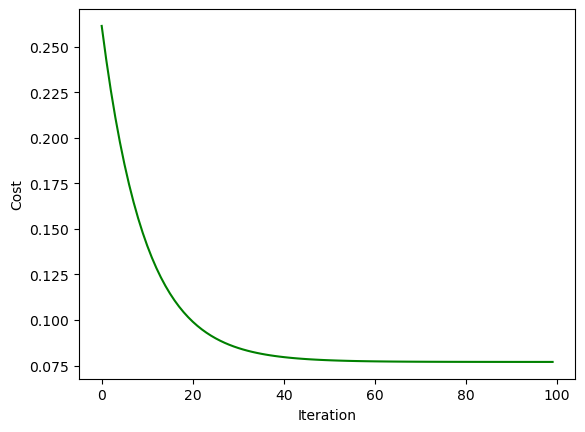

In [239]:
theta_initial = np.zeros(X.shape[1])
alpha = 1.0
iterations = 100000
theta_f = gradient_descent(X_norm, y, theta_initial, alpha, iterations)

In [197]:
y_pre = np.dot(X_norm, theta_f)

In [199]:
y_pre

array([5.54, 5.6 , 5.67, 5.78, 5.85, 5.93, 5.93, 6.16, 6.2 , 6.23, 6.24,
       6.35, 6.39, 6.57, 6.6 , 6.62, 6.86, 6.95, 7.02, 7.05, 7.18, 7.2 ,
       7.27, 7.29, 7.42, 7.54, 7.83])

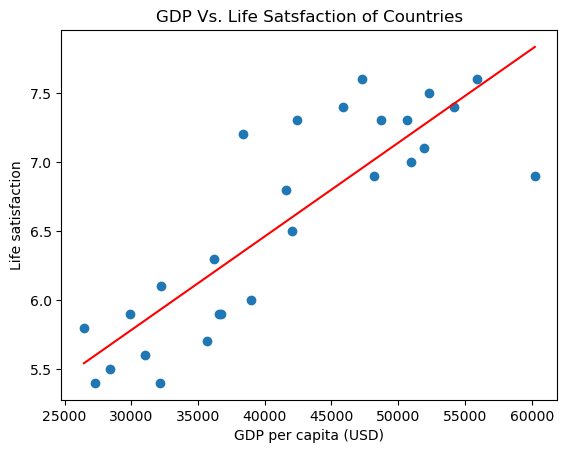

In [201]:
plt.scatter(X_main, y)
plt.plot(X_main, y_pre, color = 'red')
plt.title("GDP Vs. Life Satsfaction of Countries")
plt.xlabel("GDP per capita (USD)")
plt.ylabel("Life satisfaction");

In [185]:
def prediction(x, t = theta_f):
    x = (x - mean)/sigma
    p = x * t[1] + t[0]
    return p

In [193]:
prediction(56000)

array([7.55])

In [189]:
life_sat

,Country,GDP per capita (USD),Life satisfaction
0,Russia,26456.387938,5.8
1,Greece,27287.083401,5.4
2,Turkey,28384.987785,5.5
3,Latvia,29932.493910,5.9
4,Hungary,31007.768407,5.6
5,Portugal,32181.154537,5.4
6,Poland,32238.157259,6.1
7,Estonia,35638.421351,5.7
8,Spain,36215.447591,6.3
9,Slovenia,36547.738956,5.9


In [243]:
from sklearn.linear_model import LinearRegression

[7.54]


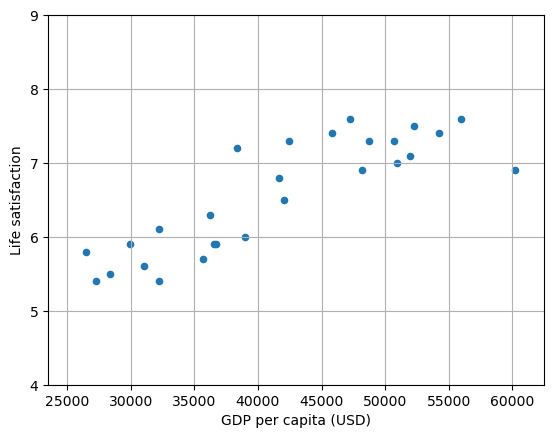

In [255]:
life_sat.plot(kind = 'scatter', grid = True, x = 'GDP per capita (USD)',
                                y = 'Life satisfaction')
plt.axis([23500, 62500, 4, 9])

#Select a model
model = LinearRegression()

# Train the model
model.fit(X_main, y)

# predict for Denmark
x_den = [[55938]]
print(model.predict(x_den))